country dataset: https://www.kaggle.com/datasets/zohrehtofighizavareh/country-dataset

In [1]:
from google.colab import files
upload = files.upload()

Saving archive.zip to archive.zip


The stucture we applied here is to following all the requirements in order

Part 1: Familiarization and Basic Testing with the k-Means Algorithm

**1.1 Dataset Selection**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('archive.zip') ## you don't need to decompess the file

print("Dataset Shape:", df.shape)
print("First 5 rows of the dataset:")
df.head()

Dataset Shape: (167, 10)
First 5 rows of the dataset:


,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# check for any missing values
print ("Missing values in each column:")
df.isnull().sum().sum()

Missing values in each column:


0

In [10]:
# check for duplicat values
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


**Part 1.2: Algorithm Application:**

In [12]:
# drop 'Country' column as it is categorical and not relevant for clustering
data = df.drop('Country', axis=1)

# standardize the data to ensure all features contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("\nData after standardization (first 5 rows):")
print(scaled_data[:5])


Data after standardization (first 5 rows):
[[ 1.29153238 -1.13827979  0.27908825 -0.08245496 -0.8082454   0.15733622
  -1.61909203  1.90288227 -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618  0.07083669 -0.3753689  -0.31234747
   0.64786643 -0.85997281 -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 -0.64176233 -0.22084447  0.78927429
   0.67042323 -0.0384044  -0.46537561]
 [ 2.00780766  0.77538117 -1.44807093 -0.16531531 -0.58504345  1.38705353
  -1.17923442  2.12815103 -0.51626829]
 [-0.69563412  0.1606679  -0.28689415  0.4975675   0.10173177 -0.60174853
   0.70425843 -0.54194633 -0.04181713]]


In [25]:
# Apply k-means clustering with an arbitrary number of clusters (e.g., k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

print("\nFirst 5 rows with cluster labels:")
print(df.head())


First 5 rows with cluster labels:
               Country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        0  
1       4.49        76.3       1.65   4090        1  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        0  
4       1.44        76.8       2.13  12200        1  


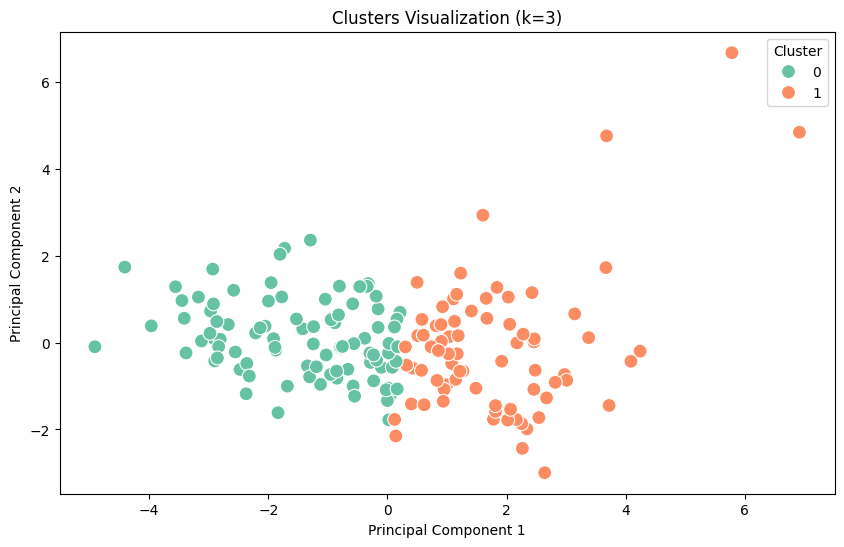

In [26]:
# Visualize the clusters in two dimensions (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Clusters Visualization (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Part 1.3: Use Cases**
1. K-Means clustering can be used in real life for customer segmentation. For instance, a company might use K-Means to group customers based on their purchasing habits. This helps in tailoring marketing strategies and promotions to different customer groups, improving engagement and sales efficiency.
2. Grouping regions or populations based on health-related metrics to study disease patterns.

**Part 2: In-Depth Experimentation**


--- Part 2: Elbow Method for Optimal k ---


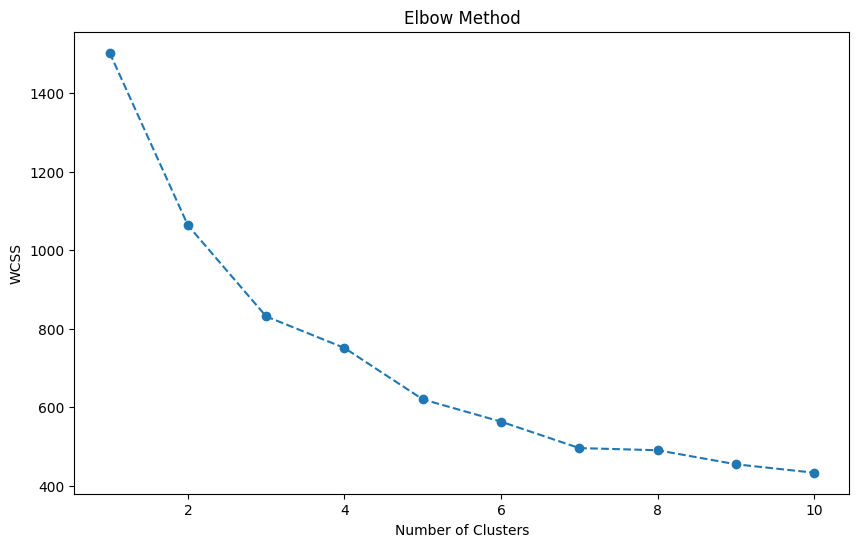

In [27]:
print("\n--- Part 2: Elbow Method for Optimal k ---")

# Apply the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster-Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
best_sil_score = -1
optimal_k = None

# Calculate Silhouette Scores for different k values
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)

    # Calculate Silhouette Score
    sil_score = silhouette_score(scaled_data, kmeans.labels_)

    # Update best_sil_score and optimal_k if current score is better
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        optimal_k = i

    print(f"\nSilhouette Score for k={i}: {sil_score}")

print(f"\nOptimal k: {optimal_k} with Silhouette Score: {best_sil_score}")

# Apply k-means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(scaled_data)

# Add optimal cluster labels to the dataset
df['Optimal_Cluster'] = kmeans_optimal.labels_


Silhouette Score for k=2: 0.2662961111870726

Silhouette Score for k=3: 0.285600988953231

Silhouette Score for k=4: 0.2880471307804802

Silhouette Score for k=5: 0.30088229124112015

Silhouette Score for k=6: 0.23565028812238528

Silhouette Score for k=7: 0.2479313491087983

Silhouette Score for k=8: 0.20198237114728412

Silhouette Score for k=9: 0.19230727869997855

Silhouette Score for k=10: 0.19624516158796698

Optimal k: 5 with Silhouette Score: 0.30088229124112015


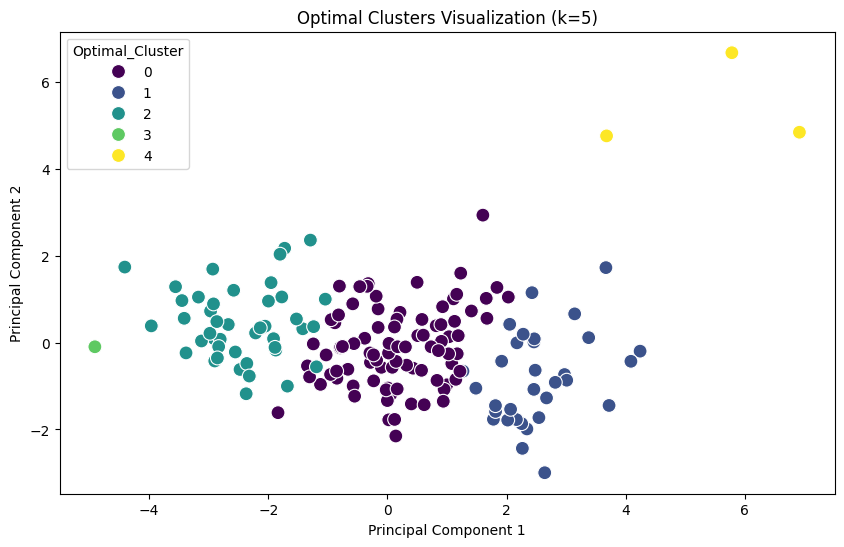

In [109]:
# Visualize the optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Optimal_Cluster'], palette='viridis', s=100)
plt.title(f'Optimal Clusters Visualization (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [110]:
# Final dataset with cluster labels
df

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Optimal_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,2
